<a href="https://colab.research.google.com/github/lanpty58/mystudy/blob/main/Optimization_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import numpy as np
def df_w(W):
  return np.array([0.2*W[0], 4*W[1]])

def sgd(W, dW, lr):
  W = W - dW*lr
  return W


def train_p1(optimizer, lr, epochs):
  W = np.array([-5, -2], dtype = np.float32)
  results = [W]
  for epoch in range(epochs):
    dW = df_w(W)
    W = optimizer(W, dW, lr)
    results.append(W)
  return results



In [100]:
results_1 = train_p1(sgd, 0.4, 30)

In [101]:
def sgd_momentum(v, W, dW, beta, lr):
  v_t = beta*v + (1-beta)*dW
  W = W - lr*v_t
  return W

def train_p2(optimizer, lr, epochs, v, beta):
  W = np.array([-5, -2], dtype = np.float32)
  results = [W]
  for epoch in range(epochs):
    dw = df_w(W)
    W = optimizer(v, W, dw, beta, lr)
    results.append(W)
  return results

v = np.array([0, 0])
results_2 = train_p2(sgd_momentum,0.6, 30,v, 0.5 )

In [102]:
def RMSProp(w, dw, s, lr, gamma, epsilon):
  s_t = gamma*s +(1-gamma)*(dw**2)
  w = w - lr*(dw/np.sqrt(s_t + epsilon))
  return w, s_t
def train_p3(optimizer, lr, epochs, s, gamma, epsilon):
  w = np.array([-5, -2], dtype = np.float32)
  results =[w]
  for epoch in range(epochs):
    dw = df_w(w)
    w, s = RMSProp(w, dw, s, lr, gamma, epsilon)
    results.append(w)
  return results

s = np.array([0, 0])
result_3 = train_p3(RMSProp, 0.3, 30, s, 0.9, 1e-6)

In [103]:
def Adam(w, dw, v, s,beta, lr, epsilon):
  s_t = beta[0]*s + (1- beta[0])*(dw**2)
  v_t = beta[1]*v + (1-beta[1])*dw
  v_corr = v_t/(1-beta[1])
  s_corr = s_t/(1-beta[0])
  w = w - lr*(v_corr/(np.sqrt(s_corr) + epsilon))
  return w, v_t, s_t

def train_p4(optimize, epochs, v, s, beta, lr, epsilon):
  w = np.array([-5, -2], dtype = np.float32)
  results = [w]
  for epoch in range(epochs):
    dw = df_w(w)
    w, v, s = Adam(w, dw, v, s, beta, lr, epsilon)
    results.append(w)
  return results

v = np.array([0, 0])
s = np.array([0, 0])
beta = np.array([0.999, 0.9])
results_4 = train_p4(Adam, 30, v, s, beta, 0.2, 1e-6)

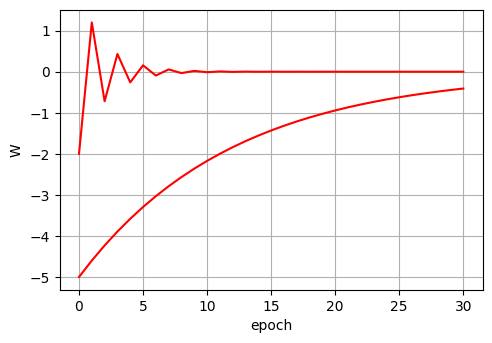

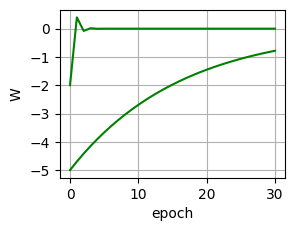

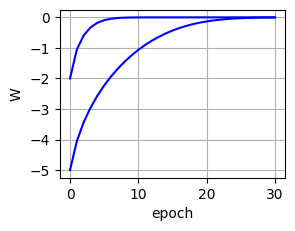

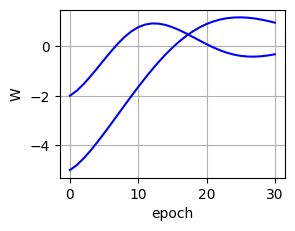

In [104]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12, 8))

plt.subplot(2, 2, 1)
plt.plot(results_1, label = 'W', color = 'red')
plt.xlabel('epoch')
plt.ylabel('W')
plt.grid(True)
plt.show()

plt.subplot(2, 2, 2)
plt.plot(results_2, label = 'W', color = 'green')
plt.xlabel('epoch')
plt.ylabel('W')
plt.grid(True)
plt.show()

plt.subplot(2, 2, 3)
plt.plot(result_3, label = 'W', color = 'blue')
plt.xlabel('epoch')
plt.ylabel('W')
plt.grid(True)
plt.show()

plt.subplot(2, 2, 4)
plt.plot(results_4, label = 'W', color = 'blue')
plt.xlabel('epoch')
plt.ylabel('W')
plt.grid(True)
plt.show()